## Oppstart

In [1]:
!curl -s "https://raw.githubusercontent.com/Yoonsen/Modules/master/module_update.py" > "module_update.py"

In [2]:
from module_update import update, css, code_toggle, printmd

In [3]:
css()

In [4]:
update('nbtext', overwrite=True)  # may remove overwrite=True
update('graph_networkx_louvain', overwrite=True)
import graph_networkx_louvain as gnl
import nbtext as nb
import networkx as nx
%matplotlib inline

Updated file `/home/lars/Lokalhistorie/nbtext.py`

Updated file `/home/lars/Lokalhistorie/graph_networkx_louvain.py`

In [5]:
def frame_sort(frame, by=0):
    return frame.sort_values(by=by, ascending=False)

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Kollokasjoner eller assosiasjoner

Hvilke ord opptrer et ord sammen med innenfor et korpus? 

In [7]:
### Hent korpus fra mappen Analysekorpus

import os
_,_,korpusfiles = next(os.walk('./Analysekorpus'))
bb_korpus = dict()
for f in korpusfiles:
    bb_korpus[f.split('.docx')[0]] = list(set(nb.get_urns_from_docx(os.path.join('./Analysekorpus', f))))
#printmd("""## Delkorpus: \n {defs}""".format(defs = '\n\n 1. ' + '\n\n 1. '.join(list(bb_korpus.keys()))))
printmd("""### Korpus definert""")

### Korpus definert

### Definerer korpuset her som BB.Urn.alle

In [8]:
korpus = bb_korpus['BB.Urn.alle']


Kommandoen nb.frame() kan benyttes på en hel del output. Gir en fin oversikt over data, og kan brukes .head() for å se de første eksemplene.



In [9]:
nb.frame(nb.metadata(korpus), ['urn', 'forfatter', 'år', 'tittel', 'utgiver', 'språk', 'oversatt fra']).head(10)

,urn,forfatter,år,tittel,utgiver,språk,oversatt fra,7,8,9
0,2015090348036,"Alsvik, Ola",2006,Storkommunen,Ringsaker,Brøttum historielag;[Brumunddal] : Brøttum his...,notfiction,5821efc1f73613aa430f9afffe0ba91a,nob,
1,2010120120001,"Sandvik, Pål Thonstad",1999,Kristiansands historie,1945-1999,Sparebanken pluss,notfiction,c8cd654cfdbb1d726954de8bd5a80abf,nob,
2,2011032108123,"Eliassen, Sven G.",2004,1930-1992,,"Tune kommune;Tune : Tune kommune, 1978-2004",notfiction,ee2438dea133a5bf127360639b692dd4,nob,
3,2007091704036,"Abrahamsen, Olav Arild",1992,1916-1940,fra brann til bombing,"Molde kommune;[Molde] : Molde kommune, 1962-1994",notfiction,dfab05e3378df299f7bd4173aee78854,nob,
4,2008030404031,"Asphaug, Arne",1995,Øygarden,,"Øygarden kommune;Tjeldstø : Øygarden kommune, ...",notfiction,f4c788dafc1c4f131823c13874e49141,nno,
5,2013101808032,,1979,Soga om Gloppen og Breim,,"Banken;Sandane : Banken, 1978-2001",notfiction,8add46a3b09d65e742ea8c51ee59e030,und,
6,2013050708007,"Flyen, Simen",1998,Nes på Romerike,,"Nes kommune;[Årnes] : Nes kommune, 1996-1998",notfiction,89d167b178af44ead0427fbf0a2208f4,nob,
7,2015021048042,"Aas, Steinar",2014,Forvandlinga,Bodøs historie : 1890-1950,Tapir akademisk forl.;Trondheim : Tapir akadem...,notfiction,e8dac3ff9786d589d393bd2a4601012f,nob,
8,2007110804031,"Bratrein, Håvard Dahl",1992,Karlsøy og Helgøy bygdebok,"folkeliv, næringsliv, samfunnsliv","Karlsøy kommune;Hansnes : Karlsøy kommune, 198...",notfiction,ad384f0f1c3e6f515b714d21a2f0937f,nob,
9,2008031104030,"Nordby, Guro",1995,1940-1992,,[Bygdebokkomiteen];Ullensaker : [Bygdebokkomit...,notfiction,fae4d76a6a4908310fa6ecd6ea08c704,nob,


## Lager kollokasjoner fra korpuset

Et skrittvis eksempel. 
1. Bygg kollokasjonen
2. Finn en referanse
3. Sammenlign kollokasjon med referanse

### Bygg kollokasjon

Kommandoen er `urn_coll()`. Legg gjerne inn en sjekk med konkordans.

In [10]:
collword = 'traktor'

In [11]:
# konkordans-sjekk

nb.urn_concordance(word = collword, urns = korpus, size = 5)

"Storkommunen, Alsvik, Ola, 2006",i formelen fra hest til,traktor,", krevde våkenhet og evne"
"Storkommunen, Alsvik, Ola, 2006",til å produsere redskaper for,traktor,.
"Storkommunen, Alsvik, Ola, 2006",kjempet uten hest og uten,traktor,med 8 mål tungdreven jord
"Storkommunen, Alsvik, Ola, 2006","skurtrøsker 107 B Ferguson ,",traktor,168
"1930-1992, Eliassen, Sven G., 2004",kommune kjøpte i 1941 en,traktor,som kunne benyttes av bondene
"Soga om Gloppen og Breim, , 1979",for hest Slåmaskin 1 for,traktor,Breim 0 2 14 172
"Soga om Gloppen og Breim, , 1979",208 1 for hest for,traktor,Rad- 1 Gloppen 0 0
"Soga om Gloppen og Breim, , 1979",gardbrukarane til å kjøpe inn,traktor,på privat basis . Maskinlaga
"Nes på Romerike, Flyen, Simen, 1998",nye oppfinnelser som sjølbinder og,traktor,. Men traktoren slo ikke
"Nes på Romerike, Flyen, Simen, 1998",sida skjønte de fleste at,traktor,", mjølkemaskin og andre tekniske"
"Nes på Romerike, Flyen, Simen, 1998",der med en gammel Fordson,traktor,som drivkraft . Dette året


Så kan vi hente ut selve kollokasjonen,dvs. ord som står innenfor en viss avstand fra målordet.

In [12]:
coll = nb.urn_coll(collword, urns = korpus, after = 5, before = 5, limit = 1000)

Kollokasjonen er en såkalt **dataframe** som kan undersøkes med `.head()` som ovenfor.

In [13]:
coll.head(10)

,0
.,217
",",137
og,126
i,102
med,94
en,79
var,68
det,59
til,57
som,55



## Finn referanse

Det er flere måter å sammenligne på. En er å bruke bokhylla selv om som referanse. For å hente ut ord fra bokhylla brukes kommandoen `totals(<antall ord>)`. Korpuset selv kan også benyttes, for eksempel med kommandoen `aggregate_urns(<korpusdefinisjon>)`.



#### Bokhylla aggregert

In [14]:
tot = nb.frame(nb.totals(top = 50000))

In [15]:
tot.head()

,0
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583


#### Aggregert korpus

In [16]:
korpus_agg = nb.aggregate_urns(korpus)

Gjør den om til dataramme, sorterer og ser på resultatet 
1. Dataramme med kommando `frame()`
2. Sortering med `frame_sort()` definert øverst i den her notebooken.

In [17]:
korpus_agg = frame_sort(nb.frame(korpus_agg))

In [18]:
korpus_agg.head(10)

,0
.,1638282
",",1538568
i,920910
og,875905
var,480942
til,441716
det,405661
av,393759
som,392182
på,372135


#### Sammenlign

Vi har nå tre frekvenslister som kan sammenlignes med hverandre. For å lette sammenlign normaliseres dem. Kommandoen for normalisering er `normalize_corpus_dataframe(<frekvensliste>)`

In [19]:
nb.normalize_corpus_dataframe(korpus_agg)
nb.normalize_corpus_dataframe(tot)
nb.normalize_corpus_dataframe(coll)

True

Inspiser dataene etter normalisering

### Aggregert korpus

Fyll inn verdier for `.head()` for å se mer.

In [20]:
korpus_agg.head()

,0
.,0.050925
",",0.047826
i,0.028626
og,0.027227
var,0.014950


### Bokhylla total

In [21]:
tot.head()

,0
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


### Kollokasjonen

In [22]:
coll.head()

,0
.,0.057867
",",0.036533
og,0.033600
i,0.027200
med,0.025067


Kollokasjonen *coll* har gjennomgående høyere verdier, noe som sannsynligvis skyldes at det er færre ord.

#### Utfør sammenligning

For sammenligning måles forskjellen på *coll* med referansen. Forskjellen måles ved å dividere hvert ords frekvens ikollokasjonen på frekvensen ordet har i referansen.

$$\textrm{assosiasjons-styrke}(w) = \frac{\textrm{coll}(w)}{\textrm{referanse}(w)}$$

Divisjonen pr.ord gjøres av Python - resultat sorteres og legges i variabelen `coll_assoc`

In [23]:
coll_assoc = frame_sort(coll**1.2/tot)

In [24]:
coll_assoc.head(20)

,0
Ferguson,293.991065
køyre,178.629135
silo,174.929864
anskaffet,153.210277
skaffa,113.977933
reiskap,111.108429
Nærøy,87.439806
traktoren,78.464758
kjøpte,72.109872
traktor,70.385521


### Sammenlign med korpus

Her kan det være nyttig å bruke en eksponent for å dempe effekten av lavfrekvente ord. Her kan det også være en idé å ta bort de lavfrekvente. Det er noe vi kan se på.

In [25]:
coll_assoc_korp = frame_sort(coll**1.5/korpus_agg)

In [26]:
coll_assoc_korp.head(20)

,0
tvillinghjul,396.237146
Traktorslått,396.237146
bakhjulsdriven,396.237146
mogul,198.118573
veltebøyle,198.118573
veggrøften,140.090987
tømmerbil,140.090987
dsvoil,140.090987
terrengtransport,140.090987
stevl,140.090987


# Visualiser med en ordsky


Visualiseringen trives best med tall mellom 0 og 1, så assosiasjonene divideres på summen av dem for å få til det. Ordskyene lages med kommonandoen `cloud(<data>)`. Pass på å ikke ta med alt for mange; det kan gi feilsituasjoner.

## Kollokasjon sammenlignet med totalen for NB-digital

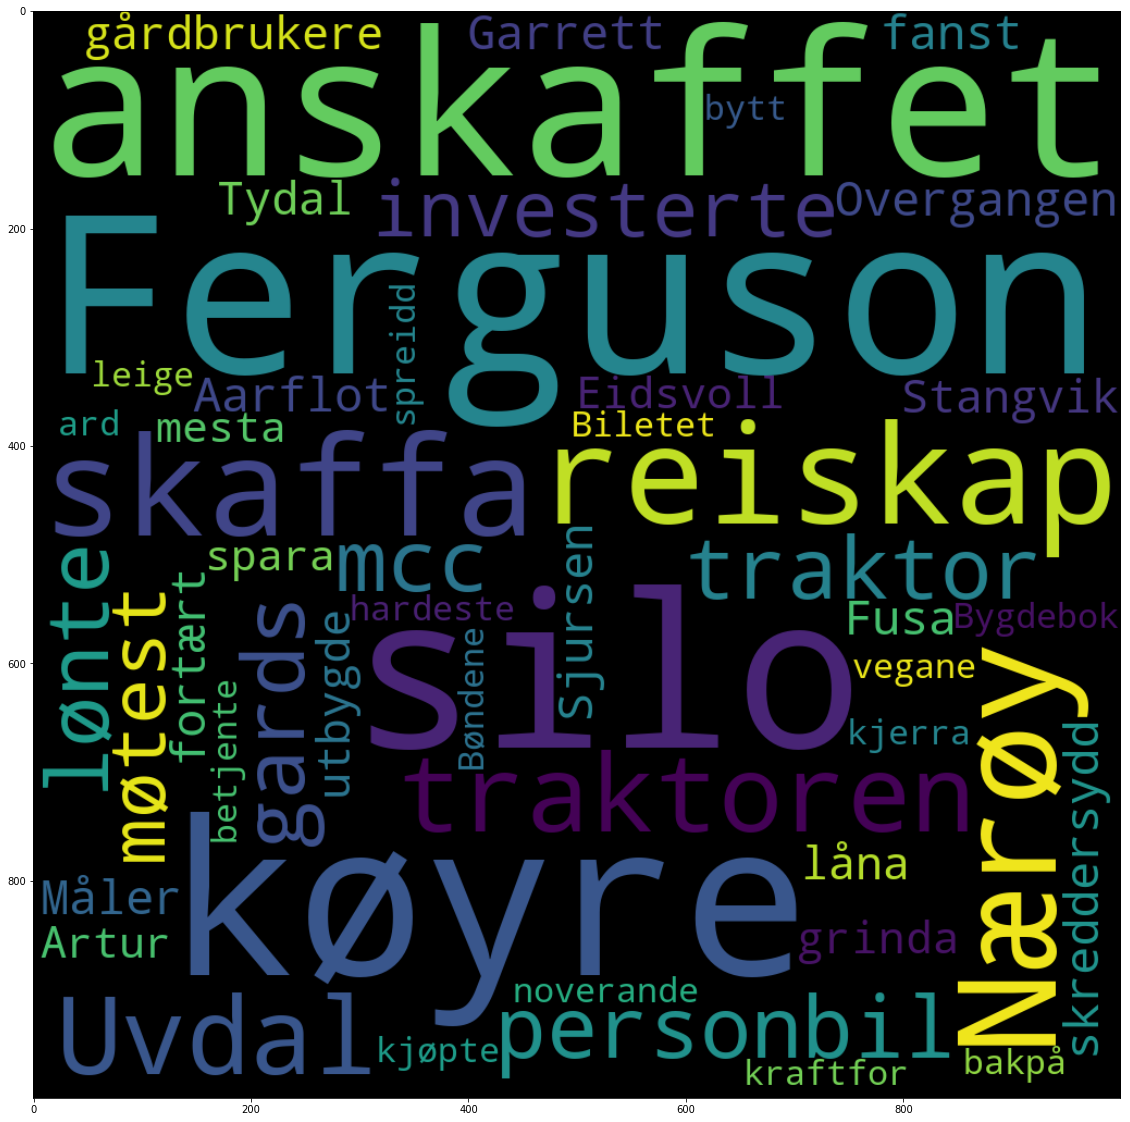

In [27]:
nb.cloud(coll_assoc.head(50)/coll_assoc.sum())

## Sammenlignet med tekstene i korpuset

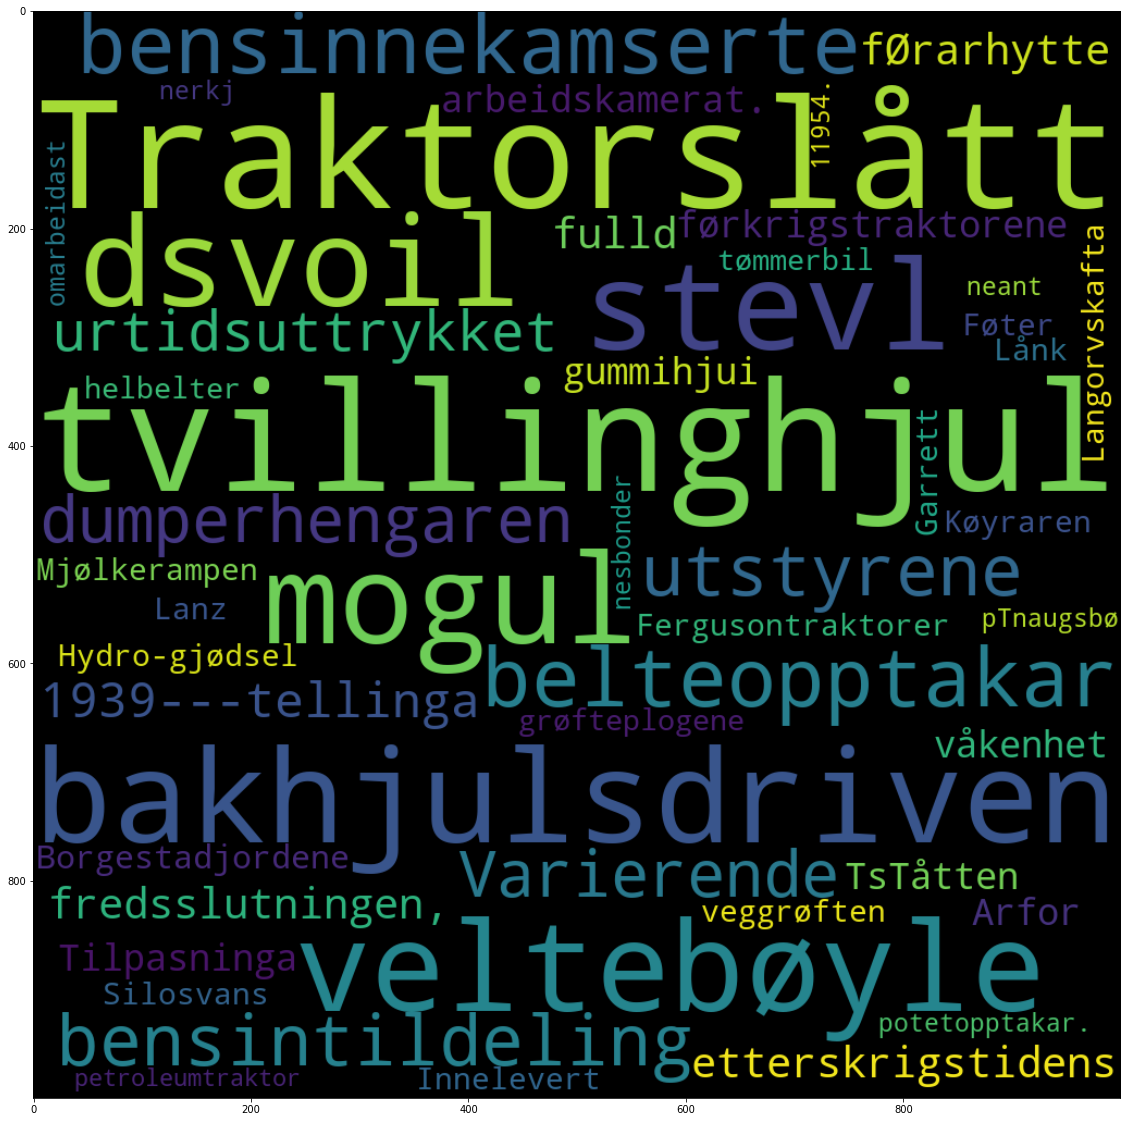

In [28]:
nb.cloud(coll_assoc_korp.head(50)/coll_assoc_korp.sum())